In [2]:
!pip install fathon #this package only available for mac and linux for now.

In [3]:
from google.colab import drive #mounting my google drive which has the dataset uploaded to it.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [5]:
import fathon
from fathon import fathonUtils as fu

In [6]:
#checking version, works with any package just replace the name
print(fathon.__version__)

'1.1'

In [7]:
import pandas as pd

In [8]:
#importing csv from gdrive
df=pd.read_csv("/content/drive/MyDrive/terrrzblueXT/intern_dataset.csv")

In [9]:
#print first 5 values
df.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


In [10]:
#To check the number of rows and columns
df.shape

(912000, 4)

In [78]:
#to know some basic statistical facts
df.describe()

,Signal1,Signal2
count,912000.000000,912000.000000
mean,31315.380483,0.398004
std,11700.734813,0.258119
min,-2934.328327,0.113841
25%,23851.958837,0.162522
50%,30650.812455,0.261210
75%,37933.966586,0.546605
max,67692.652022,1.356019


In [11]:
#separating both signal along label
a=df[df.Label=='A']
adf1=a['Signal1']
adf2=a['Signal2']

b=df[df.Label=='B']
bdf1=b['Signal1']
bdf2=b['Signal2']

c=df[df.Label=='C']
cdf1=c['Signal1']
cdf2=c['Signal2']

In [12]:
#conerting it to its aggregated form
adf1 = fu.toAggregated(adf1)
adf2 = fu.toAggregated(adf2)
bdf1 = fu.toAggregated(bdf1)
bdf2 = fu.toAggregated(bdf2)
cdf1 = fu.toAggregated(cdf1)
cdf2 = fu.toAggregated(cdf2)

##DFA
###Detrended Fluctuation Analysis

In [26]:
pyadf1 = fathon.DFA(adf1)
pyadf2 = fathon.DFA(adf2)
pybdf1 = fathon.DFA(bdf1)
pybdf2 = fathon.DFA(bdf2)
pycdf1 = fathon.DFA(cdf1)
pycdf2 = fathon.DFA(cdf2)

In [27]:
winSizes = fu.linRangeByStep(10, 2000)
revSeg = True
polOrd = 3

In [28]:
%%time
nadf1, Fadf1 = pyadf1.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)
nadf2, Fadf2 = pyadf2.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)
nbdf1, Fbdf1 = pybdf1.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)
nbdf2, Fbdf2 = pybdf2.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)
ncdf1, Fcdf1 = pycdf1.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)
ncdf2, Fcdf2 = pycdf2.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)

CPU times: user 1h 14min 50s, sys: 2.88 s, total: 1h 14min 53s
Wall time: 38min


woah the process took around 2 hours, for comuting 9 lakh rows.

In [29]:
Hadf1, H_interceptadf1 = pyadf1.fitFlucVec()
Hadf2, H_interceptadf2 = pyadf2.fitFlucVec()
Hbdf1, H_interceptbdf1 = pybdf1.fitFlucVec()
Hbdf2, H_interceptbdf2 = pybdf2.fitFlucVec()
Hcdf1, H_interceptcdf1 = pycdf1.fitFlucVec()
Hcdf2, H_interceptcdf2 = pycdf2.fitFlucVec()

In [32]:
sar2=[(nadf1, Fadf1, Hadf1,H_interceptadf1),(nadf2,Fadf2,Hadf2,H_interceptadf2),(nadf2,Fadf2,Hadf2,H_interceptadf2),(nbdf2,Fbdf2,Hbdf2,H_interceptbdf2),(ncdf1,Fcdf1,Hcdf1,H_interceptcdf1),(ncdf2,Fcdf2,Hcdf2,H_interceptcdf2)]

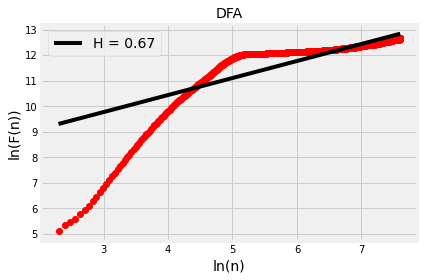

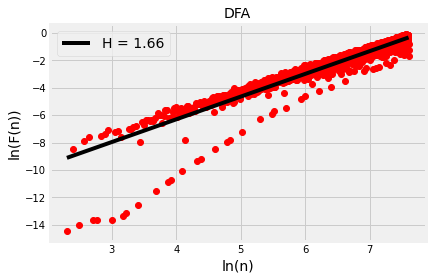

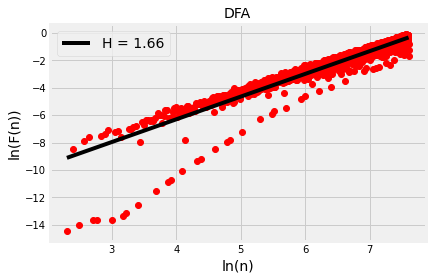

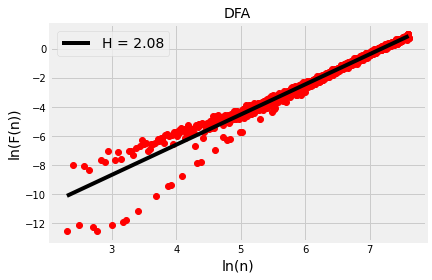

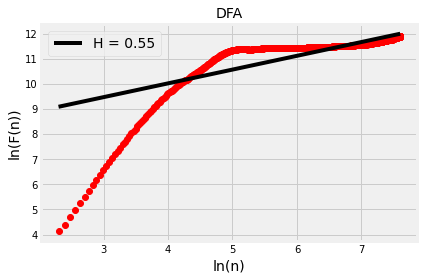

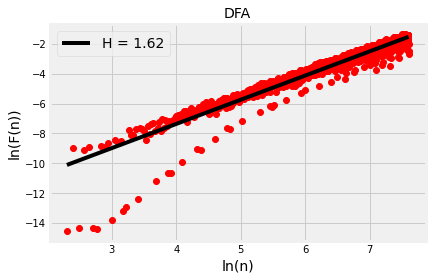

In [41]:
for i, j,k,m in sar2:
  plt.plot(np.log(i), np.log(j), 'ro')
  plt.plot(np.log(i), m+k*np.log(i), 'k-', label='H = {:.2f}'.format(k))
  plt.xlabel('ln(n)', fontsize=14)
  plt.ylabel('ln(F(n))', fontsize=14)
  plt.title('DFA respectively', fontsize=14)
  plt.legend(loc=0, fontsize=14)
  plt.show() #to see all plots together comment this line completely

##HT 
###Time-dependent Hurst exponent

In [44]:
htadf1 = fathon.HT(adf1)
htadf2 = fathon.HT(adf2)
htbdf1 = fathon.HT(bdf1)
htbdf2 = fathon.HT(bdf2)
htcdf1 = fathon.HT(cdf1)
htcdf2 = fathon.HT(cdf2)

In [45]:
scales = [100, 200, 1000]
mfdfaPolOrd = 1
polOrd = 1

In [46]:
%%time
hadf1 = htadf1.computeHt(scales, mfdfaPolOrd=mfdfaPolOrd, polOrd=polOrd)
hadf2 = htadf2.computeHt(scales, mfdfaPolOrd=mfdfaPolOrd, polOrd=polOrd)
hbdf1 = htbdf1.computeHt(scales, mfdfaPolOrd=mfdfaPolOrd, polOrd=polOrd)
hbdf2 = htbdf2.computeHt(scales, mfdfaPolOrd=mfdfaPolOrd, polOrd=polOrd)
hcdf1 = htcdf1.computeHt(scales, mfdfaPolOrd=mfdfaPolOrd, polOrd=polOrd)
hcdf2 = htcdf2.computeHt(scales, mfdfaPolOrd=mfdfaPolOrd, polOrd=polOrd)

CPU times: user 1h 4min 8s, sys: 2min 34s, total: 1h 6min 43s
Wall time: 34min 8s


In [47]:
sar3=[(hadf1),(hadf2),(hbdf1),(hbdf2),(hcdf1),(hcdf2)]

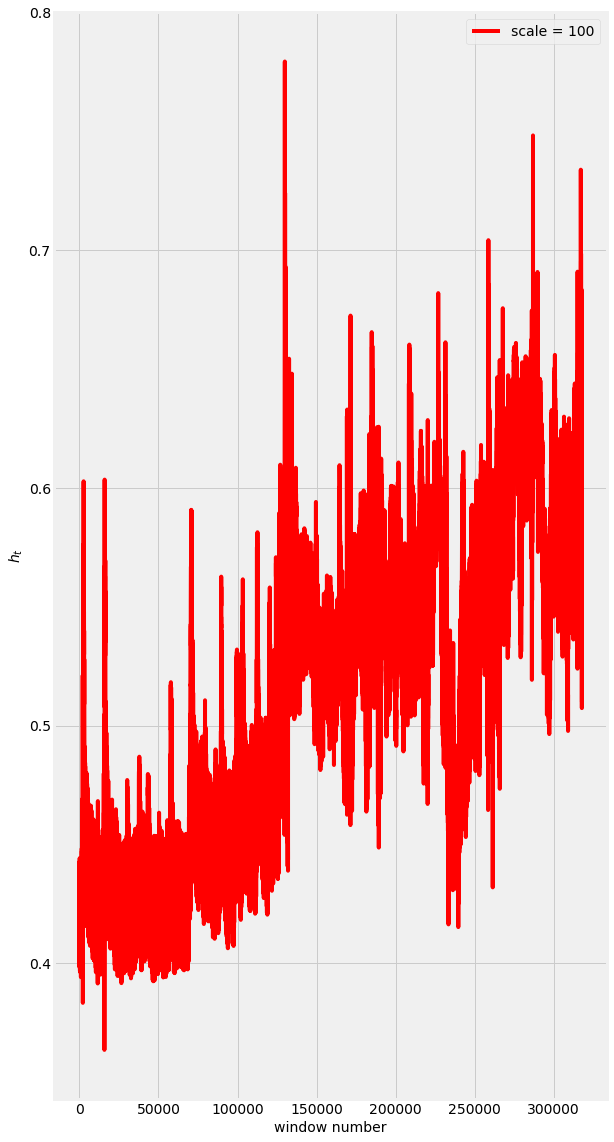

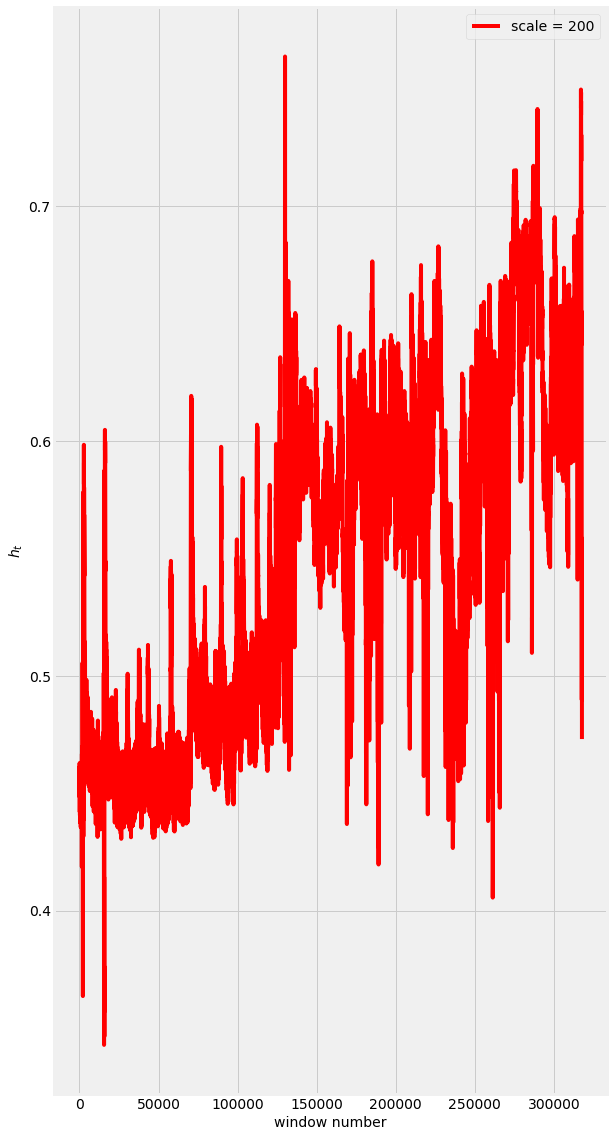

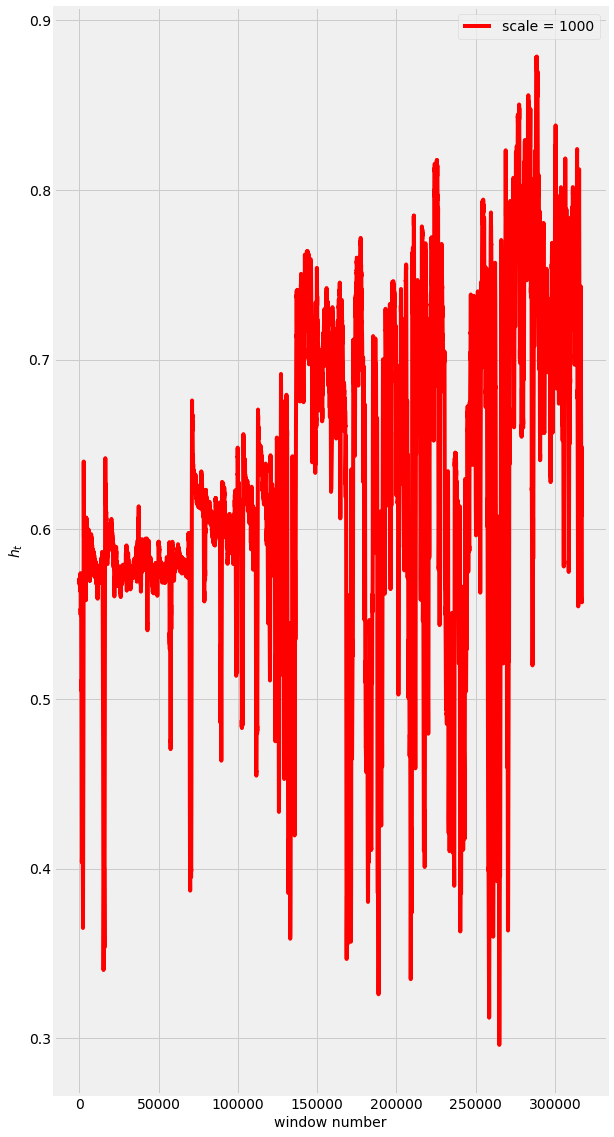

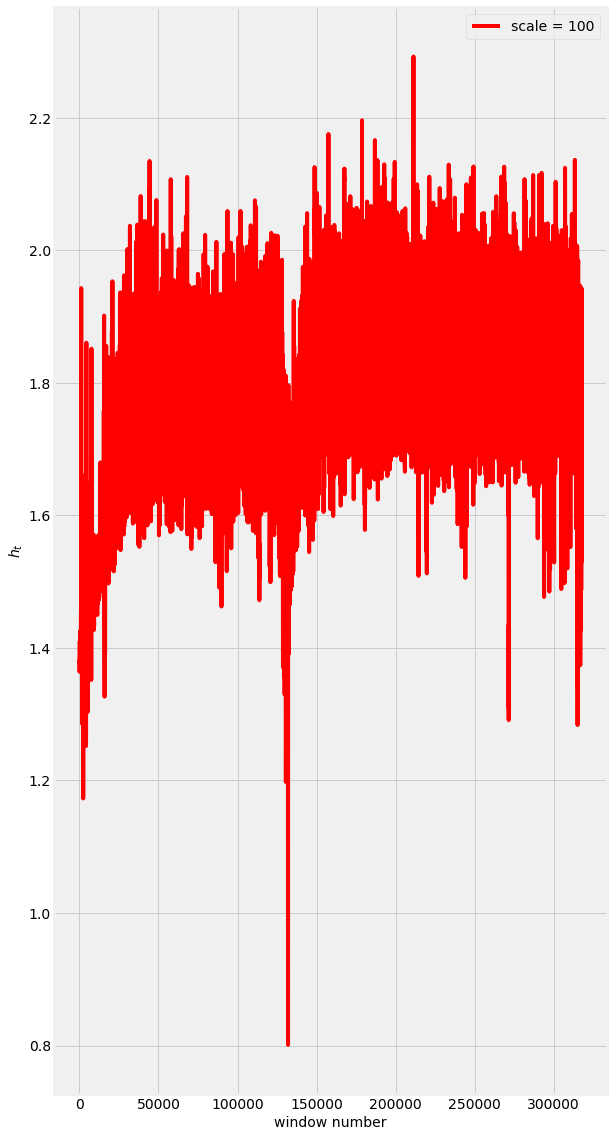

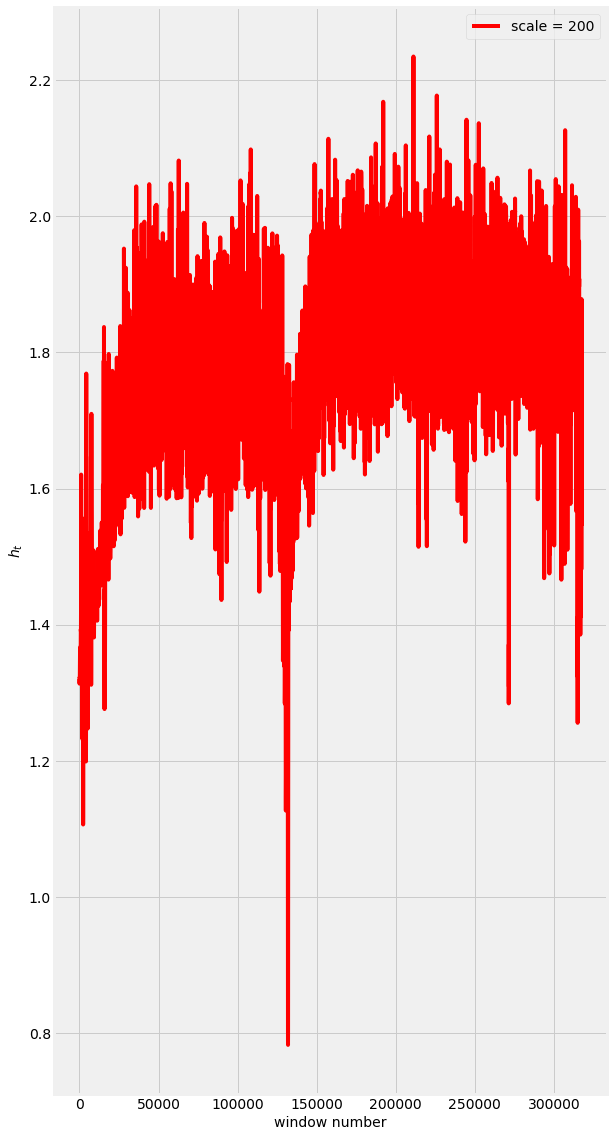

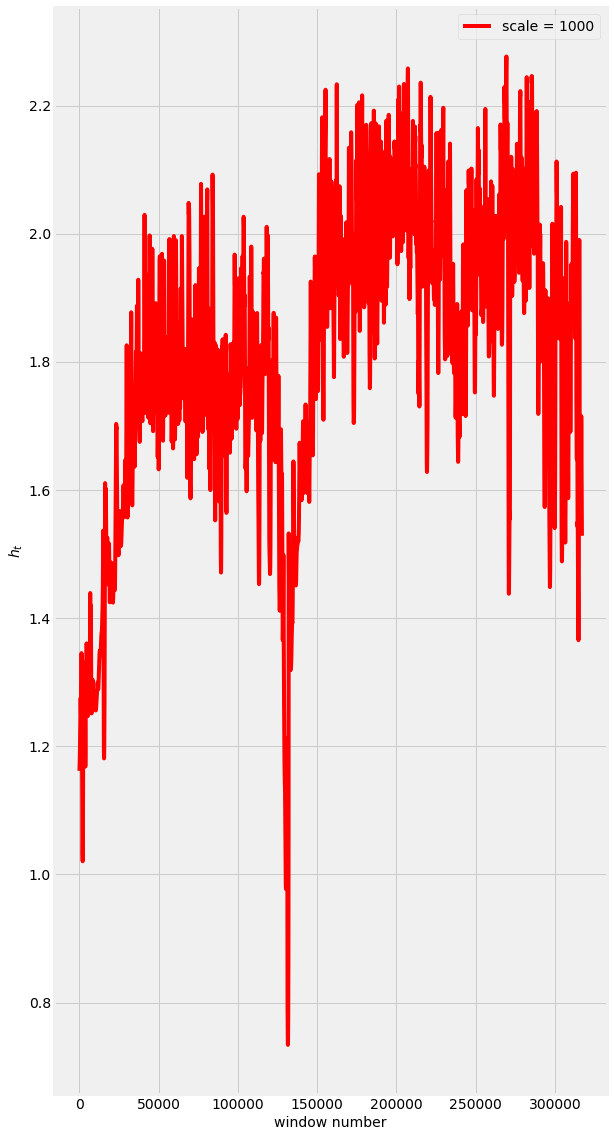

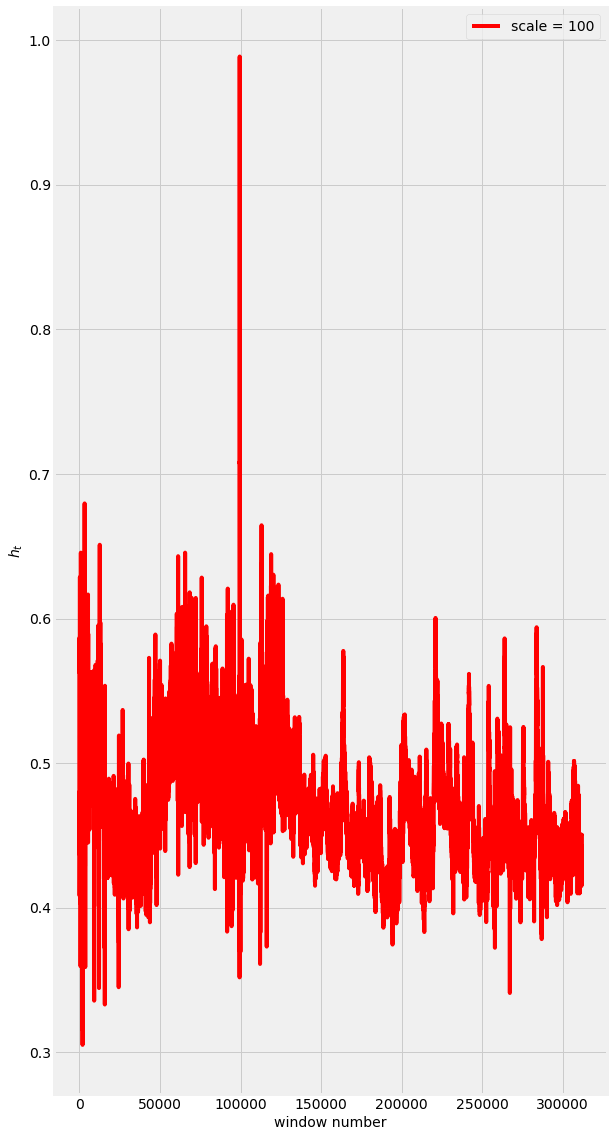

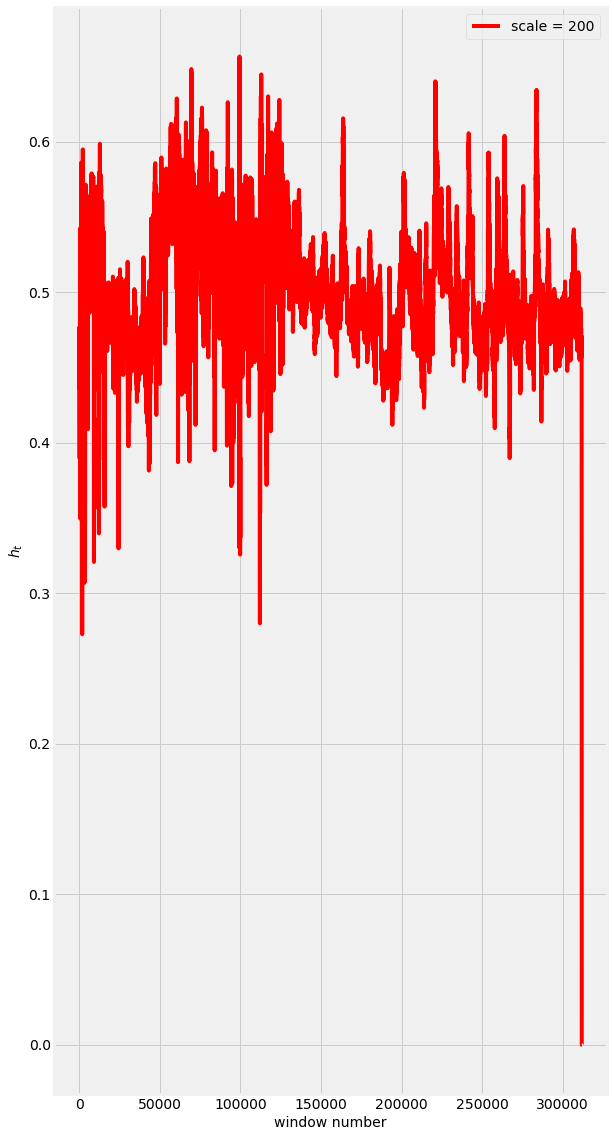

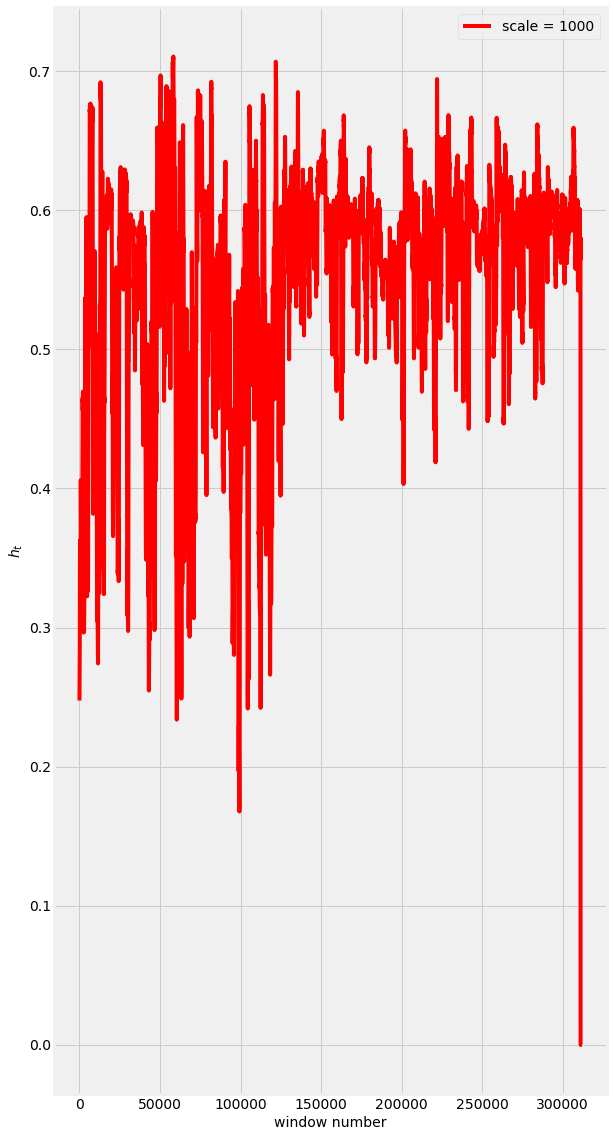

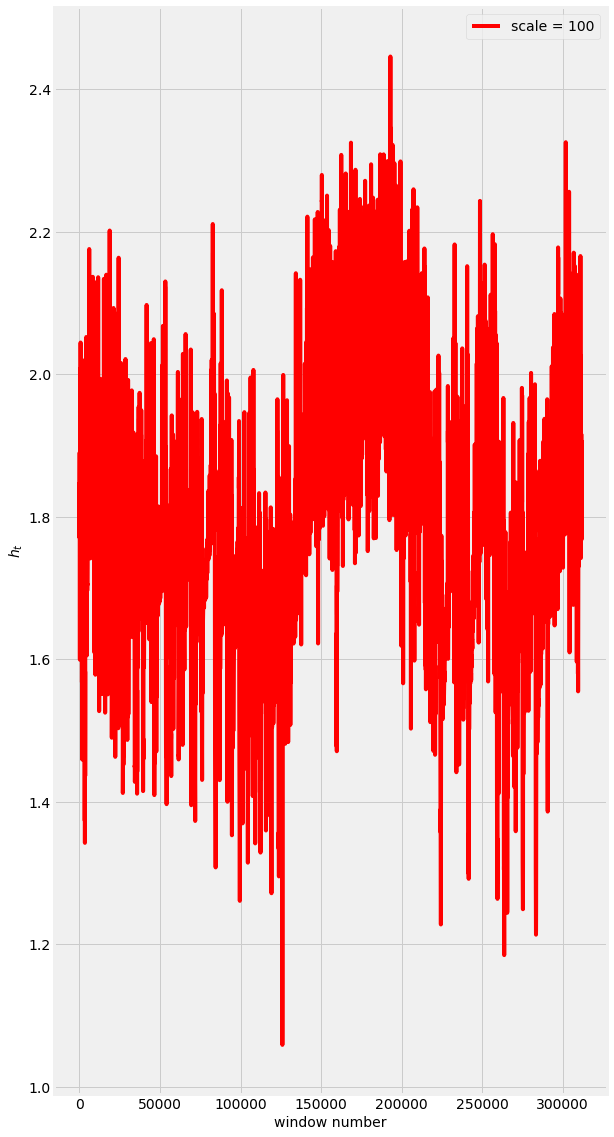

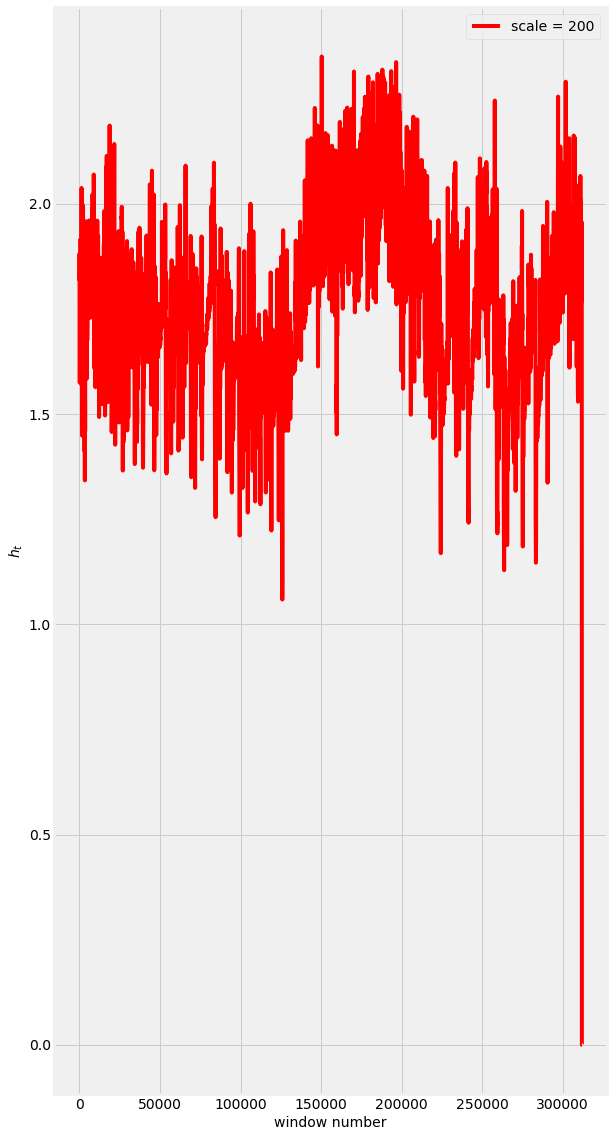

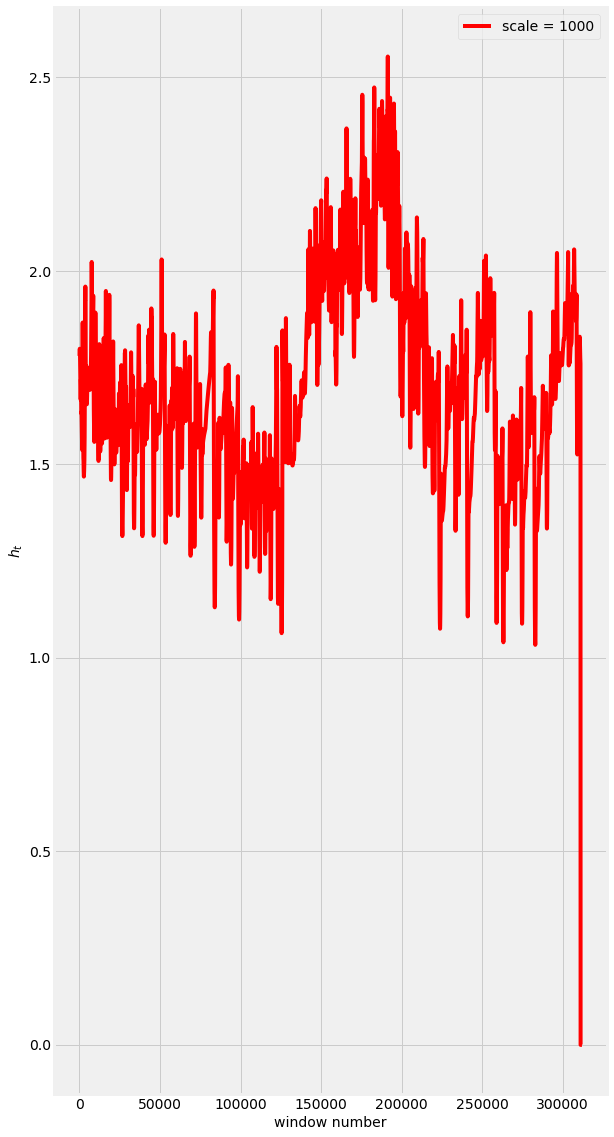

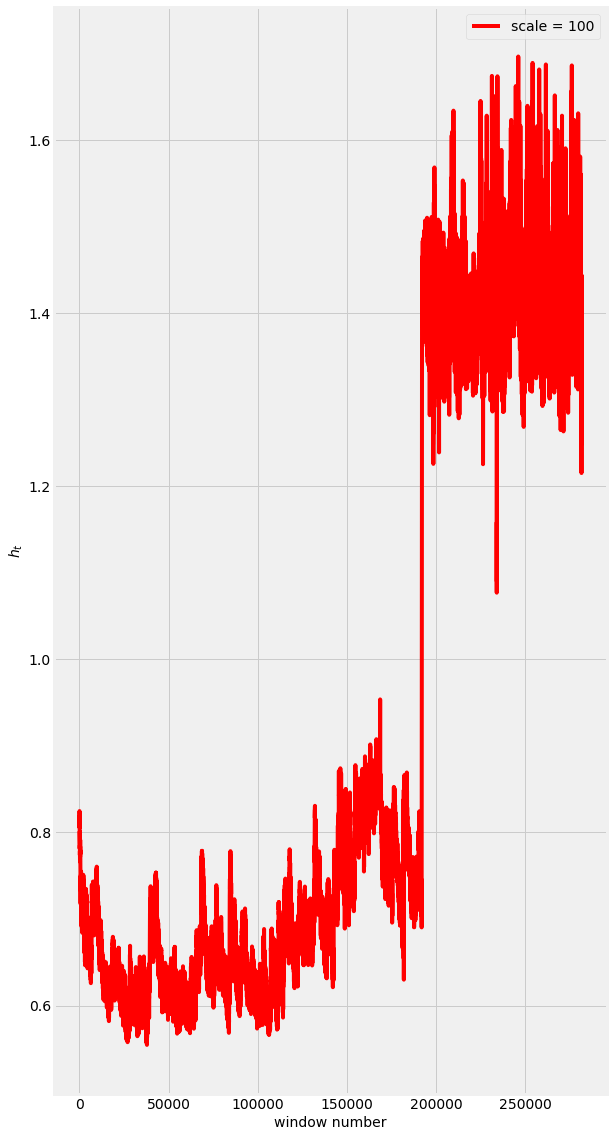

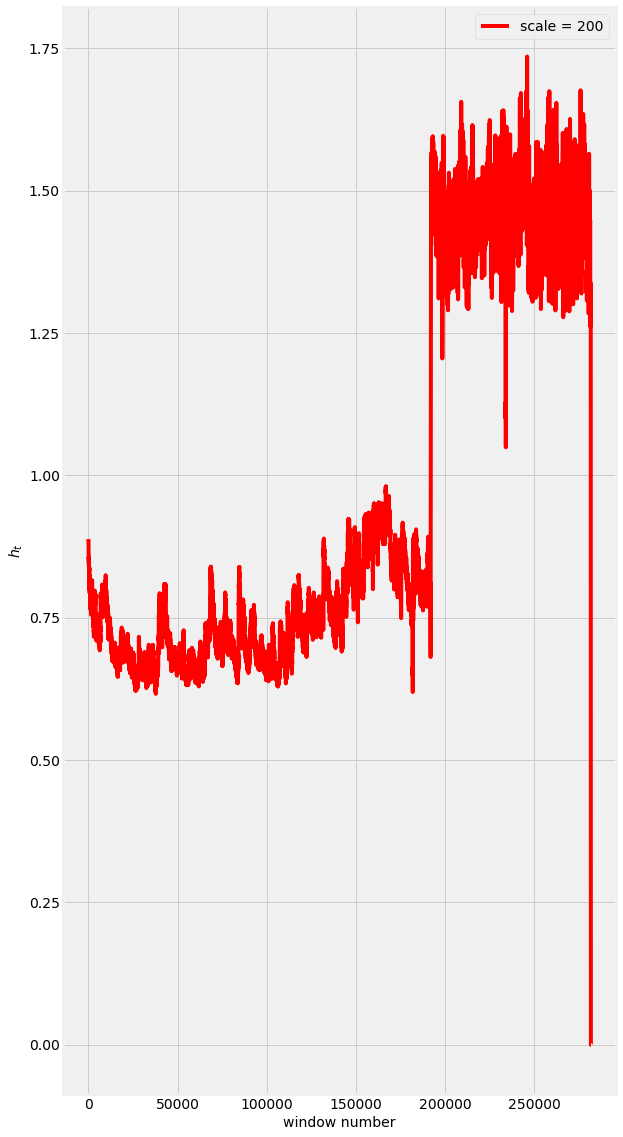

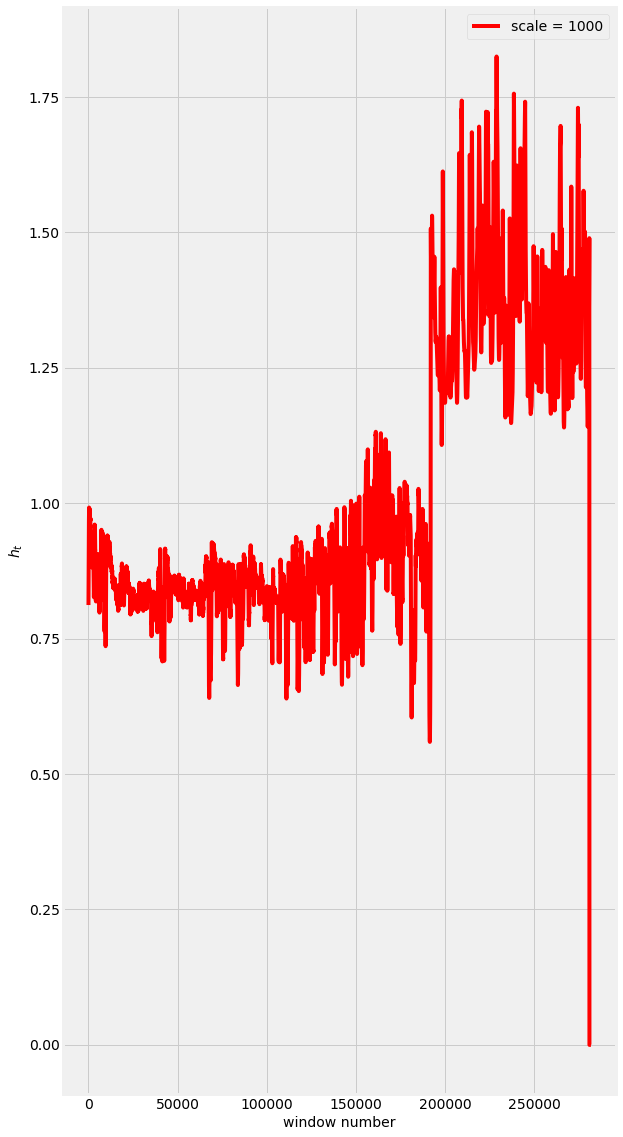

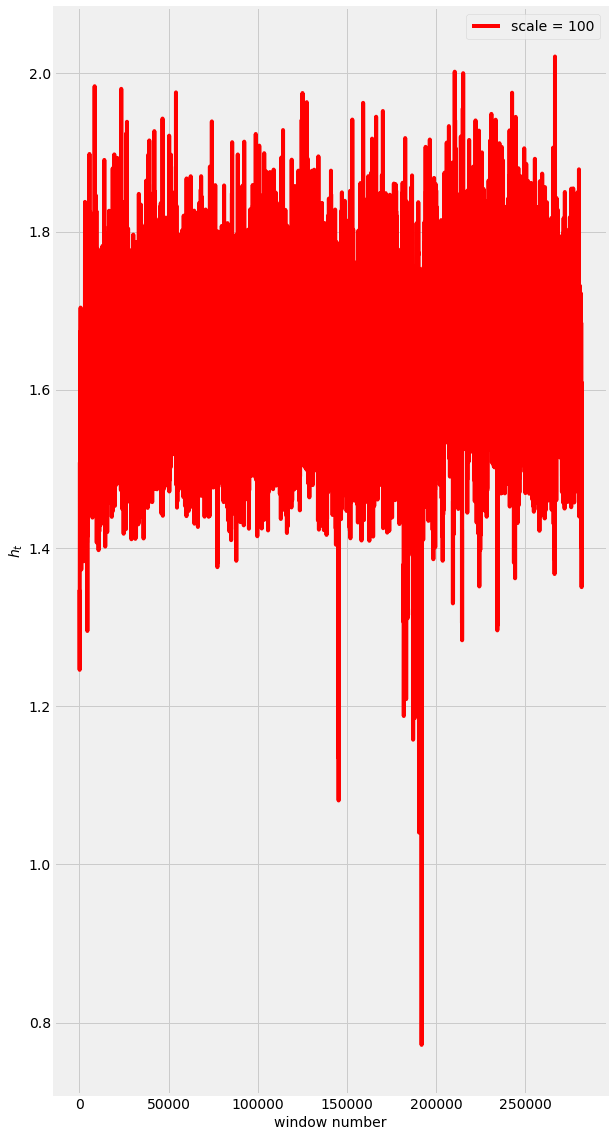

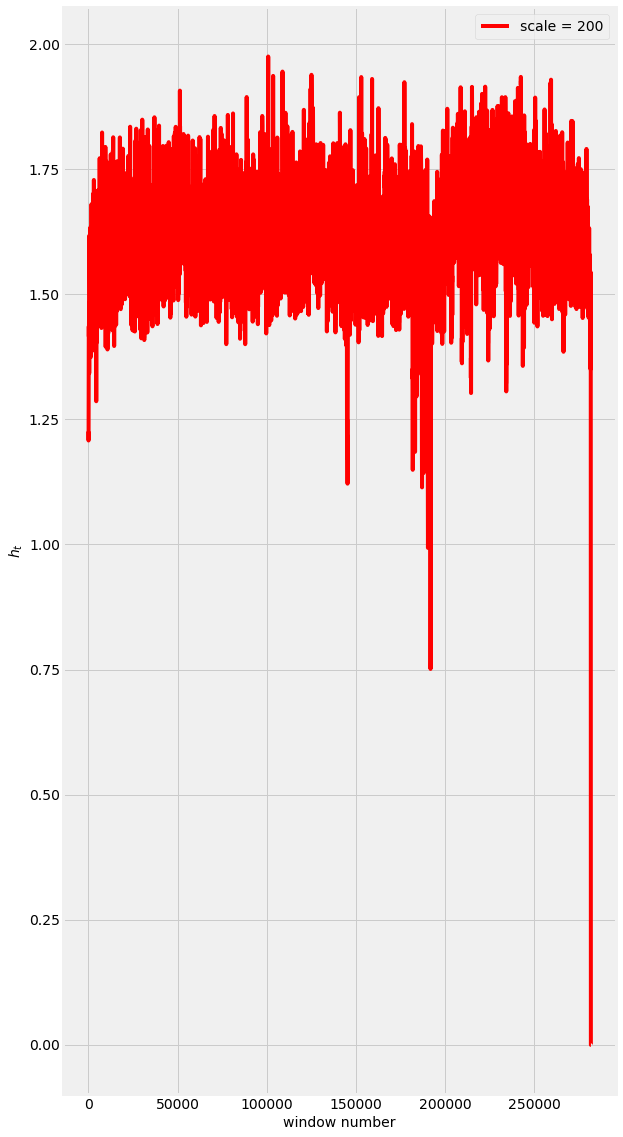

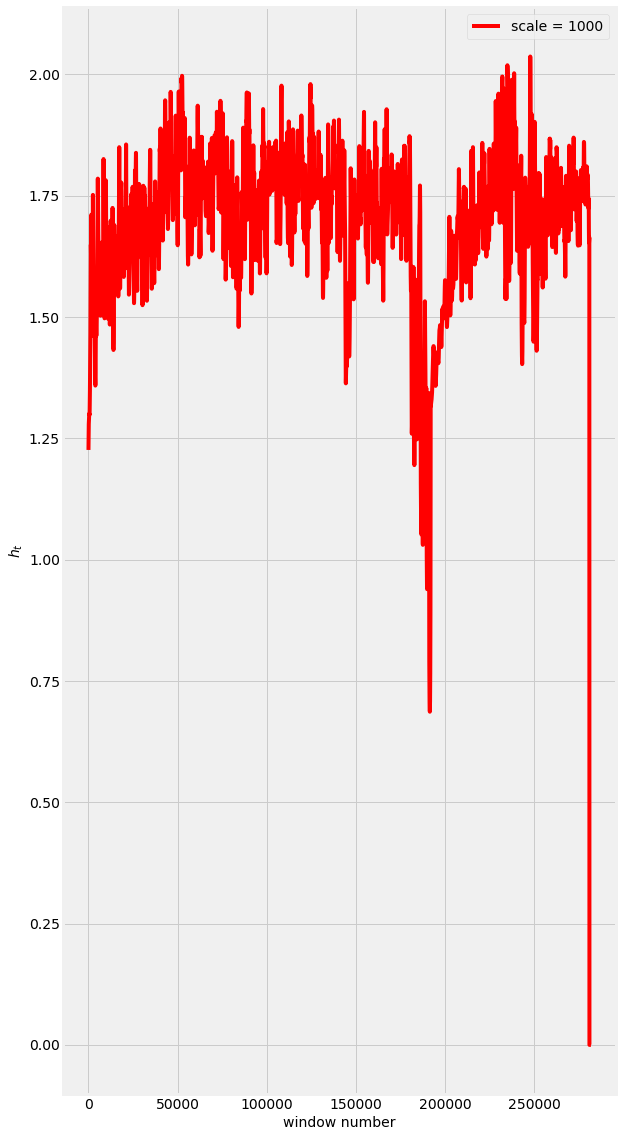

In [58]:
plt.rc('font', size=14)

w = 3 if len(scales) >= 3 else len(scales)
h = np.ceil(len(scales)/3)
for j in sar3:
  for i, scale in enumerate(scales):
      plt.figure(figsize=(30, 20))
      plt.subplot(h, w, i+1)
      plt.plot(np.arange(1, len(j[i, 0:len(a)-scale+1])+1), j[i, 0:len(a)-scale+1],
              'r-', label='scale = {}'.format(scale))
      plt.xlabel('window number', fontsize=14)
      plt.ylabel('$h_t$', fontsize=14)
      plt.legend(loc=0, fontsize=14)
  plt.show()

##after looking at the plots we can see that there is some correlation between 2 signals and we can also see that signal2 has more weightage.
##But without knowing anything about the data, like what is the signal for, I couldn't do much of the pre-processing. For example 

In [59]:
!pip install hurst

In [63]:
from hurst import compute_Hc, random_walk

ValueError: ignored

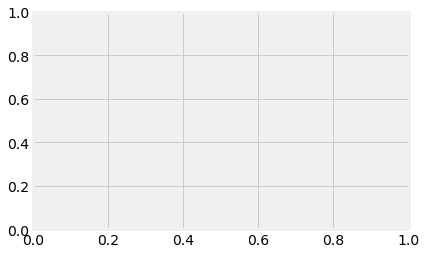

In [69]:
s = df['Signal1']
s2 = df['Signal2']
H, c, val = compute_Hc(s)
H2, c2, val2 = compute_Hc(s2)
#some loop error
'''
sar4=[(H, c, val),(H2, c2, val2)]
for i,j,k in sar3:
    axes = plt.subplots()[1]
    axes.plot(k[0], j*k[0]**i, color="blue")
    axes.scatter(k[0], k[1], color="red")
    axes.set_xscale('log')
    axes.set_yscale('log')
    axes.set_xlabel('Time interval')
    axes.set_ylabel('R/S ratio')
    axes.grid(True)
    plt.show()
'''

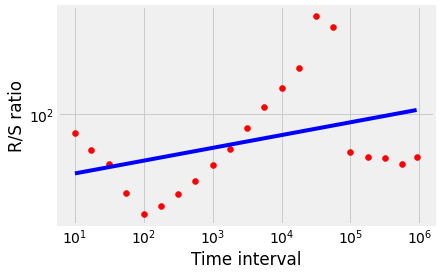

In [70]:
axes = plt.subplots()[1]
axes.plot(val[0], c*val[0]**H, color="blue")
axes.scatter(val[0], val[1], color="red")
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel('Time interval')
axes.set_ylabel('R/S ratio')
axes.grid(True)
plt.show()

In [71]:
print("Hurst exponent = {:.4f}".format(H))

Hurst exponent = 0.0602


###so Basically for signal1 which has hurst exponent value of,H=0.0602, This means signal1 is an anti-persistent time series.
###In the short term, values will tend to go against their existing trends. That is, those values which are increasing are predicted to decrease and vice-versa.

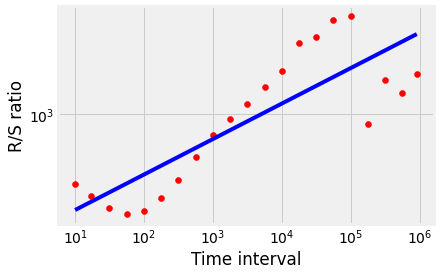

In [72]:
# Plot the graph
axes = plt.subplots()[1]
axes.plot(val2[0], c2*val2[0]**H2, color="blue")
axes.scatter(val2[0], val2[1], color="red")
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel('Time interval')
axes.set_ylabel('R/S ratio')
axes.grid(True)
plt.show()

In [74]:
print("Hurst exponent = {:.4f}".format(H2))

Hurst exponent = 0.1900


###signal1 with, H=0.1900, which also anti persistent time series

####here I thought that dataset has some outliers but that wasnt the case.